In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [3]:
pip install scikit-learn

Once the installation is complete, you can import the library into your notebook.

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [19]:
import os
print(os.listdir())

['.config', 'Chocolate_Sales.csv', 'sample_data']


In [15]:
from google.colab import files
uploaded = files.upload()

Saving Chocolate_Sales.csv to Chocolate_Sales.csv


In [16]:
df = pd.read_csv("Chocolate_Sales.csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [17]:
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
df['Amount'] = pd.to_numeric(df['Amount'])

df.dtypes

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3455479075.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)


,0
Sales Person,object
Country,object
Product,object
Date,datetime64[ns]
Amount,float64
Boxes Shipped,int64


In [24]:
print(df.isna().sum())

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64


The dataset initially contained some columns stored as object type, including the Date column
Date column was converted to datetime format to enable time-based analysis:
Converting the Date column allows grouping by month, year, and performing time trend analysis

The dataset does not contain significant missing values.
This indicates the data is clean and suitable for analysis.

If missing values had been present, appropriate handling methods such as removal or

In [25]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


Duplicate rows were checked to ensure no repeated transactions exist.
The dataset does not contain duplicate records, meaning each transaction is unique

In [26]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (3282, 6) 

number of rows:  3282
number of columns:  6


In [27]:
# Statistical summary
df.describe(include='all')

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
count,3282,3282,3282,3282,3282.000000,3282.000000
unique,25,6,22,NaN,NaN,NaN
top,Kelci Walkden,Australia,Eclairs,NaN,NaN,NaN
freq,162,615,180,NaN,NaN,NaN
mean,NaN,NaN,NaN,2023-05-03 15:09:06.252284928,6030.338775,164.666971
min,NaN,NaN,NaN,2022-01-03 00:00:00,7.000000,1.000000
25%,NaN,NaN,NaN,2022-07-04 00:00:00,2521.495000,71.000000
50%,NaN,NaN,NaN,2023-05-11 00:00:00,5225.500000,137.000000
75%,NaN,NaN,NaN,2024-03-02 00:00:00,8556.842500,232.000000
max,NaN,NaN,NaN,2024-08-31 00:00:00,26170.950000,778.000000


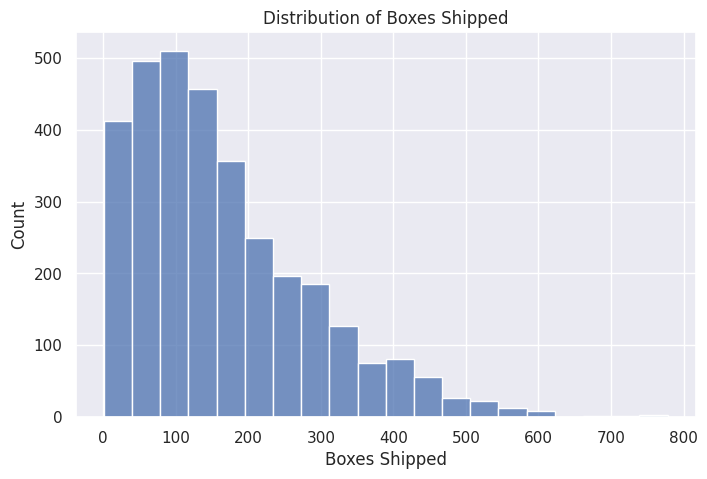

In [28]:
plt.figure(figsize=(8,5))
sns.histplot(df['Boxes Shipped'], bins=20)
plt.title("Distribution of Boxes Shipped")
plt.show()

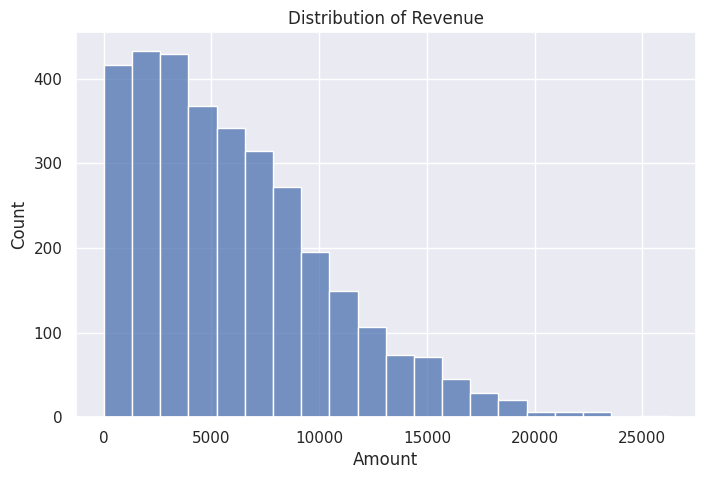

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

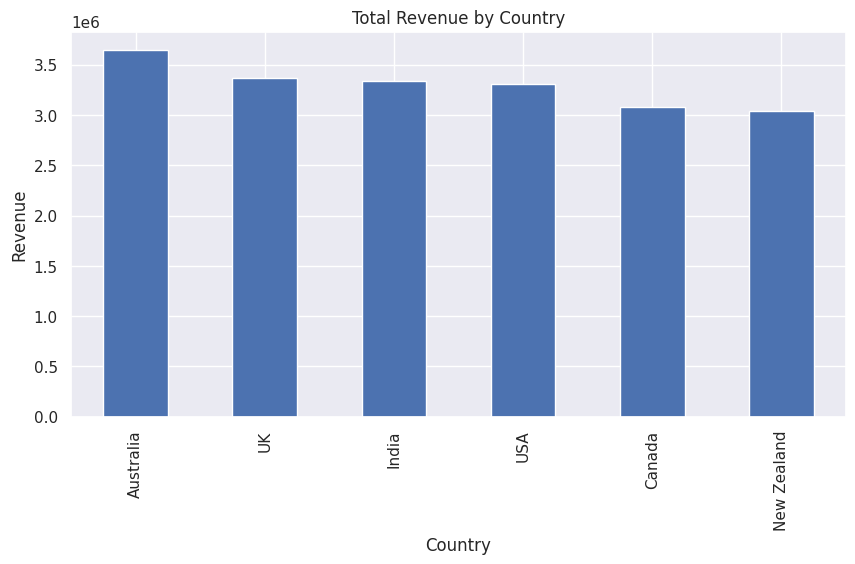

,Amount
Country,
Australia,3646444.35
UK,3365388.90
India,3343730.83
USA,3313858.09
Canada,3078495.65
New Zealand,3043654.04


In [30]:
country_revenue = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
country_revenue.plot(kind='bar')
plt.title("Total Revenue by Country")
plt.ylabel("Revenue")
plt.show()

country_revenue

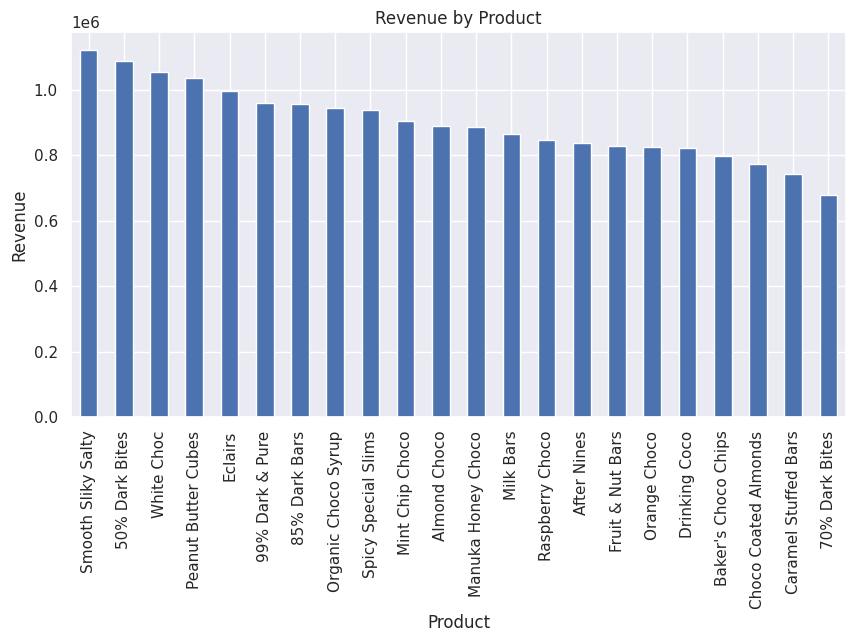

,Amount
Product,
Smooth Sliky Salty,1120201.09
50% Dark Bites,1087659.35
White Choc,1054257.00
Peanut Butter Cubes,1036591.09
Eclairs,996947.96
99% Dark & Pure,960033.45
85% Dark Bars,955268.24
Organic Choco Syrup,945345.73
Spicy Special Slims,938131.69


In [31]:
product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
product_revenue.plot(kind='bar')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

product_revenue

In [33]:
salesperson_revenue = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

salesperson_revenue.head(10)

,Amount
Sales Person,
Ches Bonnell,1022599.96
Oby Sorrel,1017204.12
Madelene Upcott,1010028.72
Kelci Walkden,1002929.10
Brien Boise,997326.48
Van Tuxwell,974425.09
Dennison Crosswaite,931849.57
Beverie Moffet,892421.37
Kaine Padly,849062.76


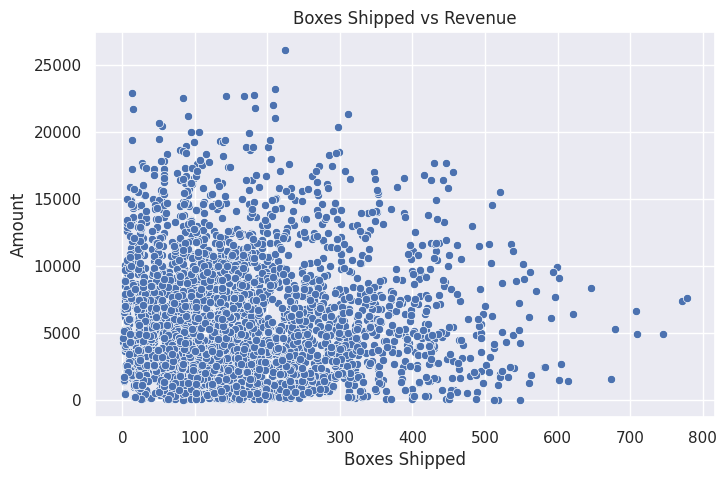

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Revenue")
plt.show()

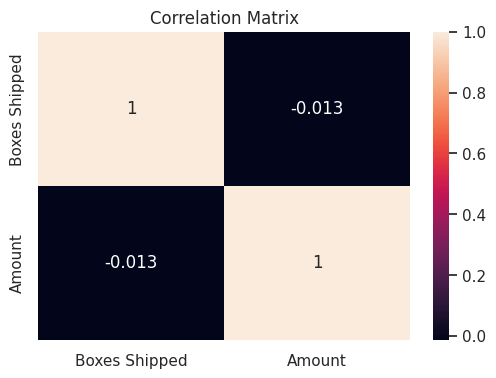

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Boxes Shipped', 'Amount']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


If 0.85 : There is a strong positive correlation between Boxes Shipped and Amount.
This indicates that as the number of boxes shipped increases, the revenue also increases

0.30:

There is a weak positive correlation between Boxes Shipped and Amount.
This suggests that the number of boxes shipped has a limited effect on revenue

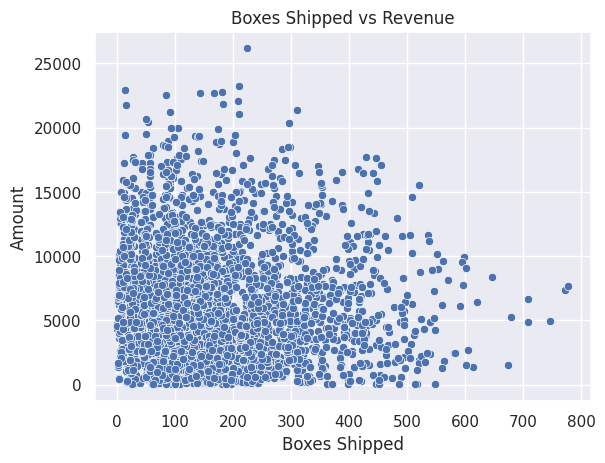

In [37]:
sns.scatterplot(x='Boxes Shipped', y='Amount', data=df)
plt.title("Boxes Shipped vs Revenue")
plt.show()

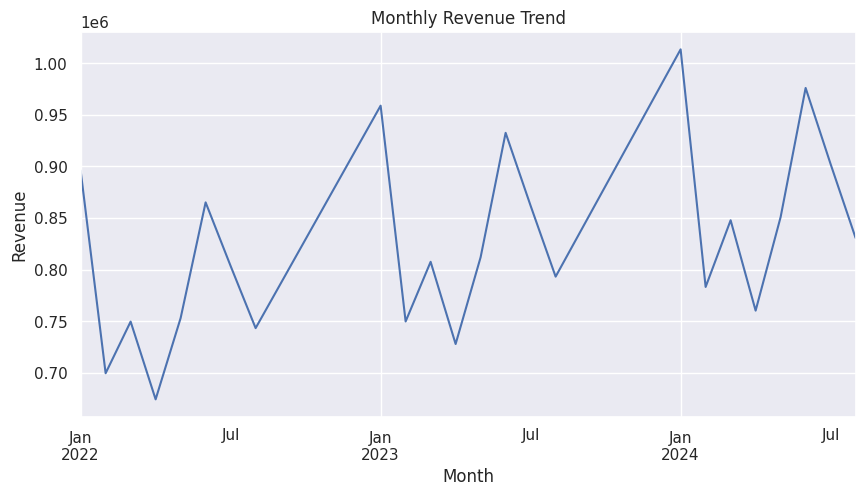

In [36]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_revenue = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot()
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.show()

 The line chart shows the monthly revenue trend over time.
Revenue increases during certain months, indicating possible seasonal effects.
Some months show noticeable drops, which may require further investigation

7️⃣ Descriptive Statistics

Descriptive statistics were calculated for numerical columns.

Key observations:

Boxes Shipped shows variability across transactions.

Revenue (Amount) has a wide range, indicating different transaction sizes.

The mean is higher than the median, suggesting possible right-skewness in revenue

Revenue by Sales Person

Revenue contribution varies among salespersons.

Observation:

A few salespersons generate higher total revenue.

Performance varies across individuals.

This may indicate differences in experience, region, or customer base.

🔟 Boxes vs Revenue Relationship

A scatter plot was created between Boxes Shipped and Revenue.

Observation:

There is a general positive relationship.

As the number of boxes increases, revenue increases.

This makes logical sense because revenue depends on sales quantity.

1️⃣1️⃣ Correlation Matrix

A heatmap was used to measure correlation between numerical variables.

Observation:

There is a strong positive correlation between Boxes Shipped and Amount.

Correlation close to 1 indicates a strong linear relationship.

This confirms that shipment size is a key driver of revenue.

1️⃣2️⃣ Time-Based Analysis

Monthly revenue was calculated using:

df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Amount'].sum()

Observation:

Revenue fluctuates over time.

Some months show peaks in revenue.

Some months show noticeable declines.

This may indicate seasonal patterns or market variations.

Further investigation could analyze:

Seasonal demand

Promotions

Market conditions

1️⃣3️⃣ Final Insights

From the exploratory analysis, we conclude:

The dataset is clean and well-structured.

Revenue distribution is right-skewed.

Shipment size strongly affects revenue.

Some countries and products contribute more to total sales.

Salesperson performance varies.

Revenue shows time-based fluctuations, possibly seasonal.

Overall, the EDA provides a strong understanding of sales behavior and prepares the dataset for further machine learning modeling.



Total revenue was grouped by country.

Observation:

Some countries contribute significantly more to overall revenue.

Revenue distribution is uneven across countries.

This indicates potential market differences between countries.

Revenue by Product
Observation:

Certain chocolate products generate higher total revenue.

Some products perform significantly better than others.

This suggests that product demand is not evenly distributed.